<a href="https://colab.research.google.com/github/homosapienssapiens/feature-engineering/blob/Draft/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto final - Ingeniería de características
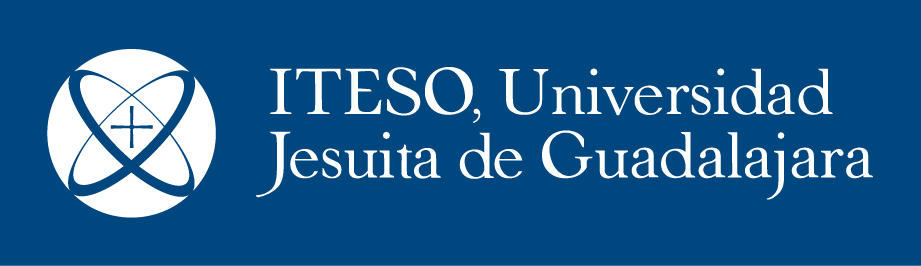  
- Miguel Angel Solis Orozco  
- Cesar Contreras González  


---


Ingeniería de características  
Instituto de Estudios Superiores de Occidente  
Prof: Dr. Carlos Augusto Arellano Muro

---



##1. Separe las variables x1 y x2 en columnas diferentes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import numpy as np
from scipy.optimize import minimize_scalar

In [2]:
route = "/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/Ingeniería de características/Trabajo final/"
df = pd.read_csv(route + "data-1.csv")

In [3]:
df

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91
...,...,...,...
6566,x2,27/12/2014,-13.30
6567,x2,28/12/2014,16.20
6568,x2,29/12/2014,5.10
6569,x2,30/12/2014,4.90


Analizando el DataFrame podemos ver que las fechas no se encuentran en el formato fecha correcto. A continuación pondremos el formato a date time.

In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91
...,...,...,...
6566,x2,2014-12-27,-13.30
6567,x2,2014-12-28,16.20
6568,x2,2014-12-29,5.10
6569,x2,2014-12-30,4.90


Creación de nuevo data frame con separación de la columna 'dato' en las columnas 'x1' y 'x2' dependiendo del valor de la columna 'nombre'.

In [5]:
dfx1 = df[df.nombre=='x1']
dfx2 = df[df.nombre=='x2']

# Merge de los dos df por columna de fecha
dfsplit = pd.merge(dfx1, dfx2, on='Fecha', suffixes=('_x1', '_x2'), how='outer')
dfsplit

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01,6.05,x2,9.22
1,x1,2006-01-02,4.72,x2,1.14
2,x1,2006-01-03,4.46,x2,-13.46
3,x1,2006-01-04,34.74,x2,3.33
4,x1,2006-01-05,1.91,x2,-0.14
...,...,...,...,...,...
3282,x1,2014-12-27,13.16,x2,-13.30
3283,x1,2014-12-28,8.50,x2,16.20
3284,x1,2014-12-29,11.03,x2,5.10
3285,x1,2014-12-30,21.33,x2,4.90


##2. Elija y justifique un método de imputación de datos para los datos perdidos y los datos menores o iguales que cero.

In [6]:
#HAcemos un nuevo data framepara llenar
dffull = dfsplit

Veamos primero la forma de las series de tiempo por pura curiosidad.

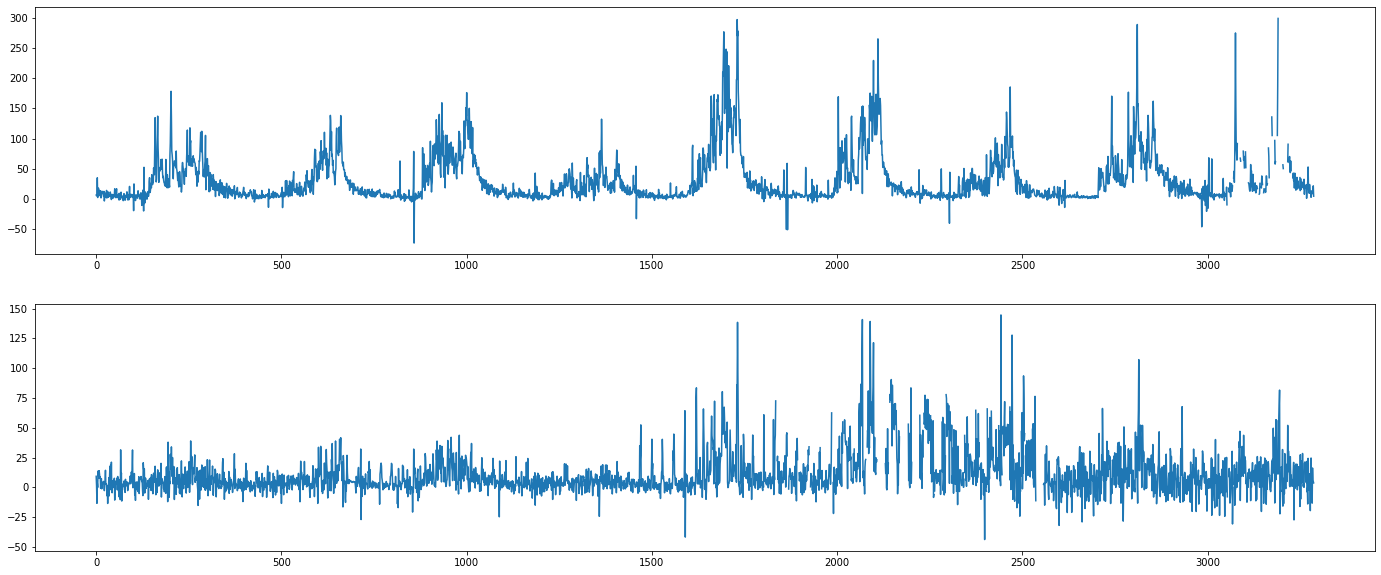

In [7]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.plot(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.plot(dffull['data_x2'])

(array([   8.,  169., 2040.,  624.,  181.,   82.,   39.,    7.,    5.,
           5.]),
 array([-43.89 , -25.031,  -6.172,  12.687,  31.546,  50.405,  69.264,
         88.123, 106.982, 125.841, 144.7  ]),
 <a list of 10 Patch objects>)

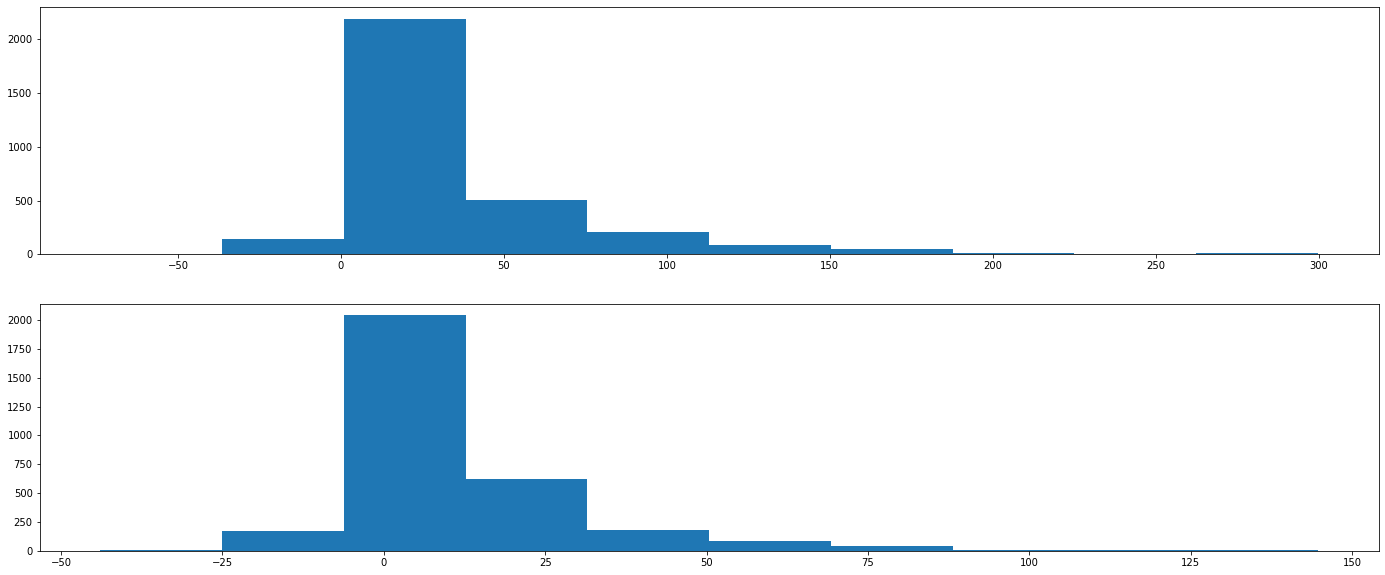

In [8]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.hist(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.hist(dffull['data_x2'])

In [9]:
dffull.describe()

,data_x1,data_x2
count,3202.000000,3160.000000
mean,30.882717,10.930712
std,39.399464,17.848627
min,-73.790000,-43.890000
25%,5.642500,1.397500
50%,15.140000,6.000000
75%,42.375000,14.912500
max,299.740000,144.700000


###Valores NaN  
He decidido reemplazar los valores NaN con un número random sacado de las mismas columnas respectivas. Se hará con random.choices() para respetar la distribución.

In [10]:
#Cantidadd de valorres NaN antes del reemplazo.
print('La cantidad de valores NaN en x1 es: ' + str(dffull['data_x1'].isna().sum()))
print('La cantidad de valores NaN en x2 es: ' + str(dffull['data_x2'].isna().sum()))

La cantidad de valores NaN en x1 es: 85
La cantidad de valores NaN en x2 es: 127


In [11]:
#Llenado de valores NaN de x1 y x2 con su mediana.
dffull['data_x1'] = dffull['data_x1'].fillna(np.random.choice(dffull['data_x1']))
dffull['data_x2'] = dffull['data_x2'].fillna(np.random.choice(dffull['data_x2']))

In [12]:
#Cantidadd de valorres NaN después del reemplazo.
print('La cantidad de valores NaN en x1 es: ' + str(dffull['data_x1'].isna().sum()))
print('La cantidad de valores NaN en x2 es: ' + str(dffull['data_x2'].isna().sum()))

La cantidad de valores NaN en x1 es: 0
La cantidad de valores NaN en x2 es: 0


###Valores iguales o menores a cero.  
He decidido usar la transformación yeo johnson para poder eliminar los valores atípicos, invertir y poder desplazar la serie de tiempo a puros datos positivos.

In [13]:
#Cantidad de valores igual o menor a cero en x1 y x2 antes del reemplazo.
print('La cantidad de valores igual o mayores a 0 para x1 es: ' + str(sum(dffull['data_x1'] <= 0)))
print('La cantidad de valores igual o mayores a 0 para x2 es: ' + str(sum(dffull['data_x2'] <= 0)))

La cantidad de valores igual o mayores a 0 para x1 es: 97
La cantidad de valores igual o mayores a 0 para x2 es: 590


Primero transformamos los datos para poder tener una distribución normal.

In [14]:
dffull['data_x1'], l1 = stats.yeojohnson(dffull['data_x1'])
dffull['data_x2'], l2 = stats.yeojohnson(dffull['data_x2'])
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01,4.345390,x2,6.855010
1,x1,2006-01-02,3.534202,x2,1.050832
2,x1,2006-01-03,3.369988,x2,-19.430526
3,x1,2006-01-04,17.400131,x2,2.806334
4,x1,2006-01-05,1.620619,x2,-0.141817
...,...,...,...,...,...
3282,x1,2014-12-27,8.155154,x2,-19.163415
3283,x1,2014-12-28,5.740604,x2,11.085260
3284,x1,2014-12-29,7.083022,x2,4.096270
3285,x1,2014-12-30,11.928406,x2,3.954547


In [15]:
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01,4.345390,x2,6.855010
1,x1,2006-01-02,3.534202,x2,1.050832
2,x1,2006-01-03,3.369988,x2,-19.430526
3,x1,2006-01-04,17.400131,x2,2.806334
4,x1,2006-01-05,1.620619,x2,-0.141817
...,...,...,...,...,...
3282,x1,2014-12-27,8.155154,x2,-19.163415
3283,x1,2014-12-28,5.740604,x2,11.085260
3284,x1,2014-12-29,7.083022,x2,4.096270
3285,x1,2014-12-30,11.928406,x2,3.954547


In [16]:
print(dffull[dffull['data_x1'] <= 100.0].index) 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286],
           dtype='int64', length=3287)


Ahora quitamos todo lo que esté fuera de 3 veces el rango intercuartílico.

In [17]:
#Obtención del el cuantil1, el cuantil 3 y el rango intercuantlico.
Q1 = dffull['data_x1'].quantile(0.25)
Q3 = dffull['data_x1'].quantile(0.75)
riq = Q3 - Q1
maxi = Q3 + riq * 1.5
mini = Q1 - riq * 1.5

#dffull.loc[dffull['data_x1'] >= max, ["data_x1"]] = random.uniform(Q1, Q3)
#dffull.loc[dffull['data_x1'] <= min, ["data_x1"]] = random.uniform(Q1, Q3)

#dffull['data_x1'].replace(dffull['data_x1'] >= max, random.uniform(Q1, Q3))
#dffull['data_x1'].replace(dffull['data_x1'] <= min, random.uniform(Q1, Q3))

for i in dffull['data_x1']:
  if i >= maxi or i <= mini:
    dffull[dffull['data_x1'] == i] = random.uniform(Q1, Q3)
    

In [18]:
dffull.loc[dffull['data_x1'] >= maxi, ["data_x1"]]

,data_x1


In [19]:
dffull.loc[dffull['data_x1'] <= mini, ["data_x1"]]

,data_x1


In [20]:
#Obtención del el cuantil1, el cuantil 3 y el rango intercuantlico.
Q1 = dffull['data_x2'].quantile(0.25)
Q3 = dffull['data_x2'].quantile(0.75)
riq = Q3 - Q1
maxi = Q3 + riq * 1.5
mini = Q1 - riq * 1.5

#dffull.loc[dffull['data_x2'] >= maxi, ["data_x2"]] = random.uniform(Q1, Q3)
#dffull.loc[dffull['data_x2'] <= mini, ["data_x2"]] = random.uniform(Q1, Q3)

#dffull['data_x2'].replace(dffull['data_x2'] >= maxi, random.uniform(Q1, Q3))
#dffull['data_x2'].replace(dffull['data_x2'] <= mini, random.uniform(Q1, Q3))

for i in dffull['data_x2']:
  if i >= maxi or i <= mini:
    dffull[dffull['data_x2'] == i] = random.uniform(Q1, Q3)

In [21]:
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01 00:00:00,4.345390,x2,6.855010
1,x1,2006-01-02 00:00:00,3.534202,x2,1.050832
2,2.5251,2.5251,2.525098,2.5251,2.525098
3,x1,2006-01-04 00:00:00,17.400131,x2,2.806334
4,x1,2006-01-05 00:00:00,1.620619,x2,-0.141817
...,...,...,...,...,...
3282,3.07567,3.07567,3.075665,3.07567,3.075665
3283,x1,2014-12-28 00:00:00,5.740604,x2,11.085260
3284,x1,2014-12-29 00:00:00,7.083022,x2,4.096270
3285,x1,2014-12-30 00:00:00,11.928406,x2,3.954547


A continuación hacemos la inversa.

In [22]:
# Función para obtener la inversa de las transformaciones Yeo-Johnson.
def inverseyj(xdef, lam):
  xo = []
  for i in xdef:
    if i >= 0 and lam != 0:
      xo.append(((lam*i+1)**1/lam)+1)
    else:
      if i >= 0 and lam == 0:
        xo.append(np.exp(i-1))
      else:
        if i < 0 and lam != 2:
          xo.append(((2*i - lam*i + 1)**1/(2-lam)) + 1)
        else:
          if i < 0 and lam == 2:
            xo.append(1 - np.exp(i))
  return xo

In [23]:
dffull['data_x1'] = inverseyj(dffull['data_x1'], l1)
dffull['data_x2'] = inverseyj(dffull['data_x2'], l2)

In [24]:
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01 00:00:00,6.709690,x2,9.093007
1,x1,2006-01-02 00:00:00,5.898503,x2,3.288830
2,2.5251,2.5251,4.889399,2.5251,4.763095
3,x1,2006-01-04 00:00:00,19.764432,x2,5.044332
4,x1,2006-01-05 00:00:00,3.984920,x2,1.696938
...,...,...,...,...,...
3282,3.07567,3.07567,5.439966,3.07567,5.313662
3283,x1,2014-12-28 00:00:00,8.104905,x2,13.323257
3284,x1,2014-12-29 00:00:00,9.447323,x2,6.334267
3285,x1,2014-12-30 00:00:00,14.292707,x2,6.192544


Por último desplazamos todos los valores a positivos.

In [25]:
#Desplazamiento de x1 a positivos
x1dif = -np.min(dffull['data_x1'])
dffull['data_x1'] = dffull['data_x1'] + x1dif + 1

#Desplazamiento de x2 a positivos
x1dif = -np.min(dffull['data_x2'])
dffull['data_x2'] = dffull['data_x2'] + x1dif + 1

In [26]:
#Cantidad de valores igual o menor a cero en x1 y x2 después del reemplazo.
print('La cantidad de valores igual o menores a 0 para x1 es: ' + str(sum(dffull['data_x1'] <= 0)))
print('La cantidad de valores igual o menores a 0 para x2 es: ' + str(sum(dffull['data_x2'] <= 0)))

La cantidad de valores igual o menores a 0 para x1 es: 0
La cantidad de valores igual o menores a 0 para x2 es: 0


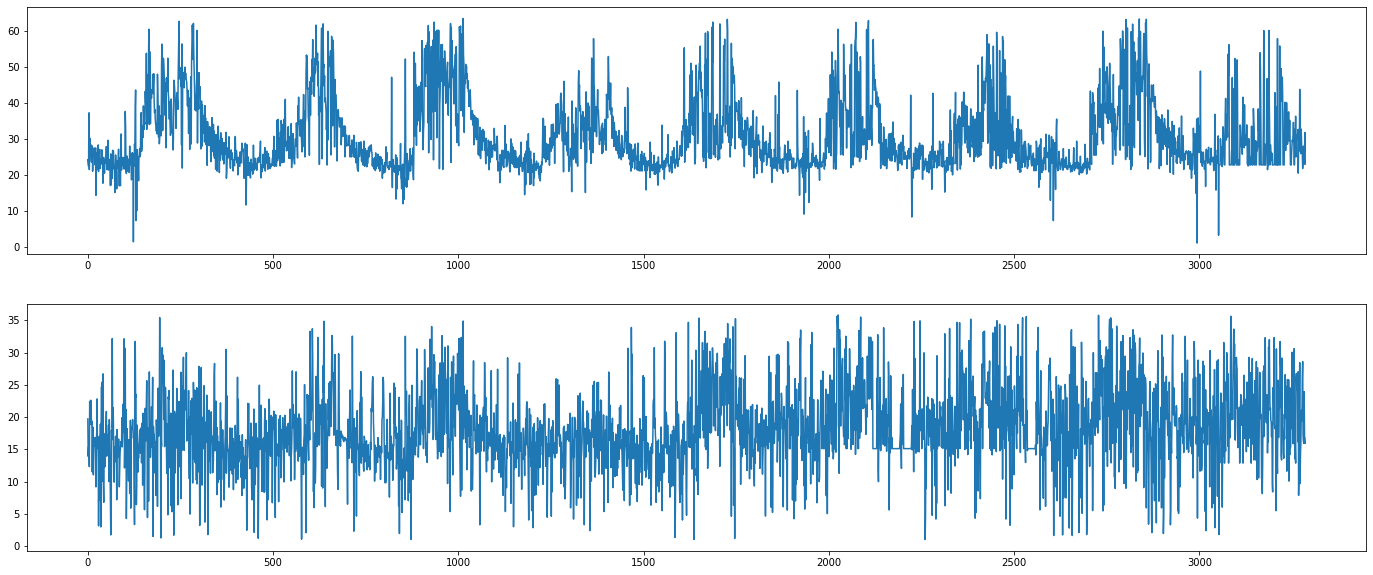

In [27]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.plot(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.plot(dffull['data_x2'])

Los datos han alterado su distribución, pero ya cumplimos con los requerimientos solicitados en el paso 2.

(array([  55.,  110.,  184.,  477., 1053.,  628.,  349.,  231.,  129.,
          71.]),
 array([ 1.        ,  4.48401463,  7.96802926, 11.45204389, 14.93605851,
        18.42007314, 21.90408777, 25.3881024 , 28.87211703, 32.35613166,
        35.84014629]),
 <a list of 10 Patch objects>)

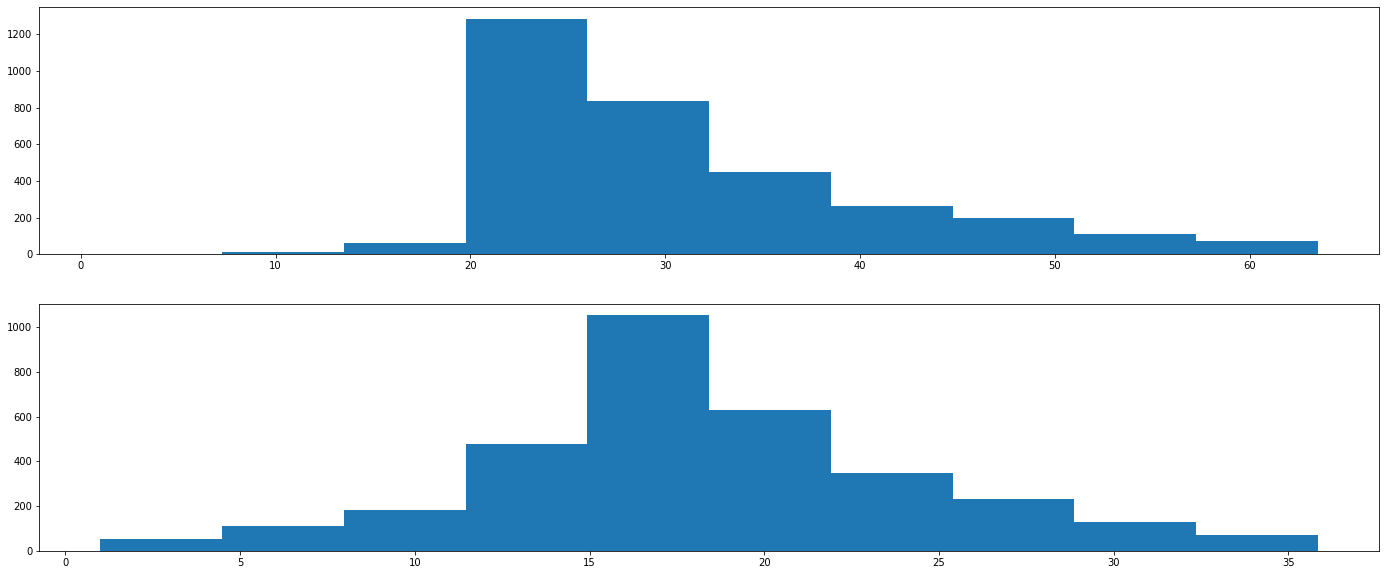

In [28]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.hist(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.hist(dffull['data_x2'])

##3. Encuentre un shapelet de longitud 365 y otro de longitud 1460 para cada variable.

In [29]:
len(dffull)

3287

In [30]:
shapelet1, shapelet2 = random.randint(0, len(dffull)-365), random.randint(0, len(dffull)-1460)

In [31]:
shapelet2

753

In [32]:
def C(a,b):
  m=min(len(a),len(b))
  n=max(len(a),len(b))

  # nos aseguramos de que 'b' tenga la longitud más grande
  if len(b)<len(a):
    b1=a
    a=b
    b=b1
  Corr=np.inf
  for l in range(n-m+1):
    Corr=min(Corr,(np.sum(a*b[l:l+m])-m*np.mean(a)*np.mean(b))/(m*np.std(a)*np.std(b)))
  return Corr

In [33]:
def d(a,b):
  x=stats.zscore(a)
  y=stats.zscore(b)
  return np.sqrt(2*(1-C(x,y)))

In [34]:
w = 100

In [35]:
def obj(u,serie,w=w):
  u=int(round(u))
  s=pd.DataFrame(serie[u:u+w])
  x=serie.values
  y=s.values
  return d(x,y)

In [36]:
# Función para shapelet
# Parámetros:
# ts: Serie de tiempo
# r: Rango 
def shapelet (ts, r):
  #w = random.randint(0, len(ts) - r)
  s = random.randint(0, len(ts) - w)
  shapelet = pd.DataFrame(ts[s:s + r])
  x=ts.values
  y=shapelet.values
  sol = minimize_scalar(obj,bounds=[0, len(ts)-w],method='bounded',args=(ts,))
  u = int(round(sol.x))
  res = pd.DataFrame(ts[u:u+w])
  return plt.plot(shapelet), plt.plot(res)

([<matplotlib.lines.Line2D at 0x7feb4b181c10>],
 [<matplotlib.lines.Line2D at 0x7feb4b195450>])

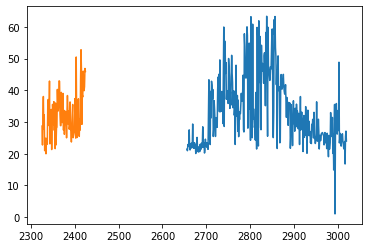

In [37]:
shapelet(dffull['data_x1'], 365)

([<matplotlib.lines.Line2D at 0x7feb4b1012d0>],
 [<matplotlib.lines.Line2D at 0x7feb4b109ad0>])

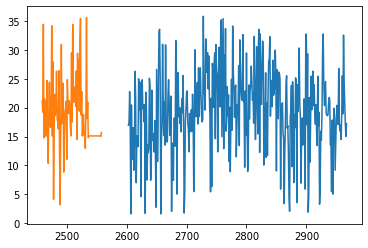

In [38]:
shapelet(dffull['data_x2'], 365)

([<matplotlib.lines.Line2D at 0x7feb4b0ee9d0>],
 [<matplotlib.lines.Line2D at 0x7feb4b083210>])

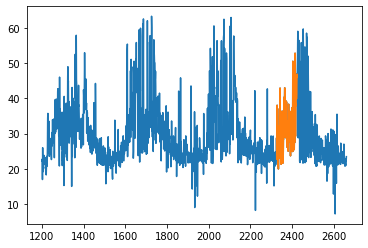

In [39]:
shapelet(dffull['data_x1'], 1460)

([<matplotlib.lines.Line2D at 0x7feb4b0639d0>],
 [<matplotlib.lines.Line2D at 0x7feb4b076210>])

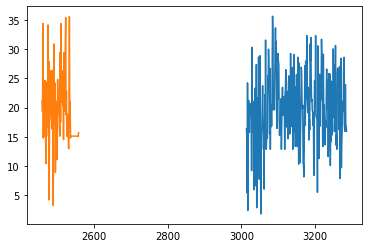

In [40]:
shapelet(dffull['data_x2'], 1460)